# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

PATH_DATASET = "./UCI HAR Dataset/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

def standardize_data(arr):
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

X = standardize_data(X_train)

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [2]:
X.shape

(7352, 561)

In [3]:
covariance_matrix = np.cov(X.T)

In [4]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [5]:
idx = eigen_values.argsort()[::-1]   
eigenValues_order = eigen_values[idx]
eigenVectors_order = eigen_vectors[:,idx]


#poner los 64 eigenvalores
projection_matrix = (eigenVectors_order.T[:][:64]).T



X_pca = X.dot(projection_matrix)

print(X_pca.shape)

#ahora en vez de 561 tengo 64 componentes




(7352, 64)


c:\Users\Esgoty\anaconda3\envs\FIUBA001\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


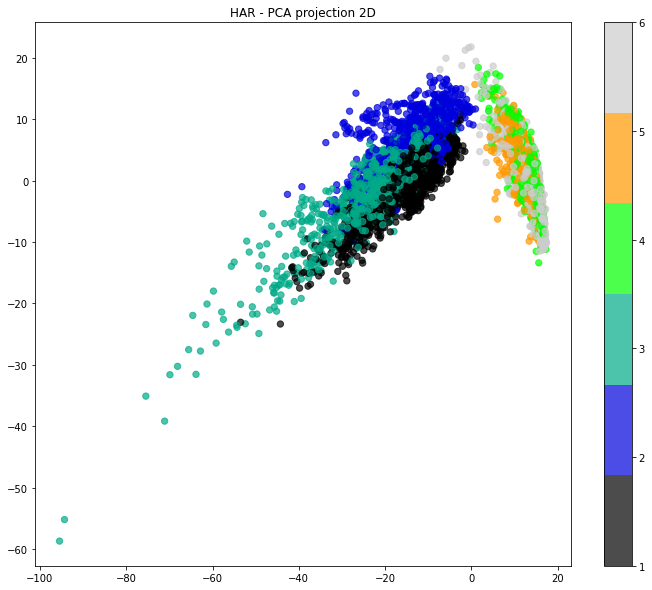

In [6]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [10]:
np.random.seed(0)


def initialize_clusters(points, k):
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    return np.linalg.norm(points - centroid, axis=1)


k1=2
k2=6
maxiter=50

# Initialize our centroids by picking random data points
centroids = initialize_clusters(X_pca, k1)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X_pca.shape[0], dtype=np.float64)
distances = np.zeros([X_pca.shape[0], k1], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X_pca)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k1):
        centroids[c] = np.mean(X_pca[classes == c], 0)



## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [ ]:
# Son bastante parecidos ambos,

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
RANDOM_STATE = 17

In [2]:
from sklearn.datasets import fetch_openml
Xminst, yminst = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


In [3]:
print(Xminst.shape)
print(yminst.shape)

(70000, 784)
(70000,)


In [4]:
scaler = StandardScaler()
X_minstscaled = scaler.fit_transform(Xminst)

In [5]:
pcaminst = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_minstscaled)
X_pcaminst = pcaminst.transform(X_minstscaled)
X_pcaminst.shape

(70000, 238)

In [14]:
kmeansminst = KMeans(n_clusters=3, n_init=50, random_state=RANDOM_STATE)
kmeansminst.fit(X_pcaminst)
cluster_labels = kmeansminst.labels_

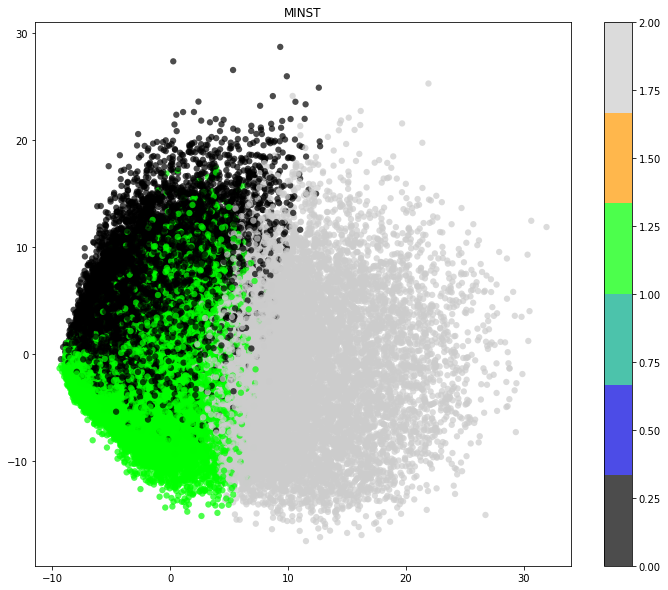

In [15]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X_pcaminst[:, 0], X_pcaminst[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MINST');